In [85]:
import torch 
from torch import nn 
from einops import rearrange

class JigsawAugmentation(nn.Module): 
    # x tiles and y tiles must perfectly divide the image dimension
    def __init__(self, x_tiles: int, y_tiles: int):
        super().__init__()
        self.x_tiles = x_tiles 
        self.y_tiles = y_tiles

    def forward(self, image): 
        B, _, H, W = image.shape
        assert H % self.x_tiles == 0 
        assert H % self.y_tiles == 0 

        # each image is split into subgrids
        grids = rearrange(image, 'b c (hs h) (ws w) -> b (hs ws) c h w', hs=self.y_tiles, ws=self.x_tiles)

        # generate shuffle indices 
        indices = torch.argsort(torch.rand((B, self.x_tiles * self.y_tiles)), dim=-1)
        # shuffle the jigsaw 
        grids = grids[torch.arange(B).unsqueeze(-1),indices, :, :, :]
        grids = rearrange(grids, 'b (hs ws) c h w -> b c (hs h) (ws w)', hs=self.y_tiles, ws=self.x_tiles)
        return grids 


In [81]:
import matplotlib.pyplot as plt
def show_image(image): 
    plt.figure()
    return plt.imshow(image.permute(1, 2, 0))

In [82]:
## load image dataset 
from hydra.utils import instantiate 
from hydra import initialize, compose

with initialize("../configs"): 
    dataset = instantiate(compose("val_dataset/imagenette_val.yaml")).val_dataset


In [83]:
from torch.utils.data import DataLoader

dataloader = DataLoader(dataset, batch_size=5)

# grab 1 batch 
for b in dataloader: 
    image, y = b
    break


In [86]:
aug = JigsawAugmentation(4, 4)
augmented = aug(batch)

In [ ]:
show_image(augmented[1])

torch.Size([5, 3, 224, 224])


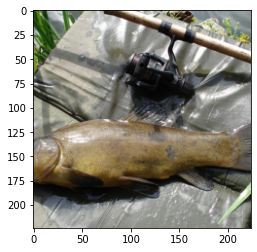

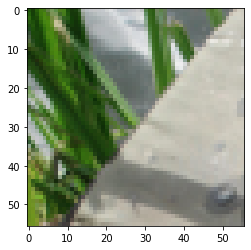

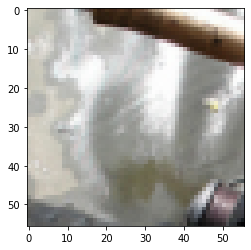

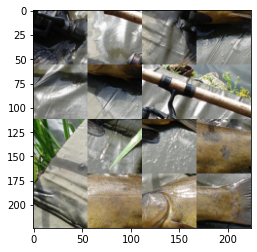

In [79]:
print(image.shape)
B, _, H, W = image.shape
show_image(image[0])
grids = rearrange(image, 'b c (hs h) (ws w) -> b (hs ws) c h w', hs=4, ws=4)
show_image(grids[0][0])
show_image(grids[0][1])
# # generate shuffle indices 
indices = torch.argsort(torch.rand((B, 16)), dim=-1)
# # shuffle the jigsaw 
grids = grids[torch.arange(B).unsqueeze(-1),indices, :, :, :]
grids = rearrange(grids, 'b (hs ws) c h w -> b c (hs h) (ws w)', hs=4, ws=4)
show_image(grids[0])